# 1. Descripcion del Proyecto

Cookie Cats es un juego de rompecabezas para móviles extremadamente popular desarrollado por Tactile Entertainment. Es un juego de rompecabezas clásico del estilo "conecta tres", en el que el jugador debe conectar fichas del mismo color para despejar el tablero y ganar el nivel. También incluye gatos que cantan. ¡No estamos bromeando!

A medida que los jugadores avanzan en el juego, se encontrarán con puertas que los obligan a esperar un tiempo antes de poder progresar o realizar una compra dentro de la aplicación. En este proyecto, analizaremos los resultados de una prueba A/B en la que la primera puerta en Cookie Cats se movió del nivel 30 al nivel 40. En particular, analizaremos el impacto en la retención de jugadores y en las rondas del juego.

Para completar este proyecto, deberías sentirte cómodo trabajando con DataFrames de pandas y utilizando el método de gráficos de pandas. También deberías tener cierto entendimiento sobre pruebas de hipótesis y análisis de bootstrap.

<div style="border-left: 5px solid #4CAF50; background-color:transparent; padding: 10px; margin: 10px 0;">
    <strong>Nota:</strong> El análisis de bootstrap es una técnica estadística utilizada para estimar la distribución de un estadístico (como la media, la mediana o la varianza) mediante el remuestreo de los datos disponibles. Es un método no paramétrico, lo que significa que no hace suposiciones sobre la forma de la distribución subyacente de los datos. En lugar de eso, se basa en la idea de tomar múltiples muestras con reemplazo (es decir, permitiendo que un mismo dato aparezca más de una vez) de los datos originales para generar una distribución empírica del estadístico de interés.
</div>

<div style="border-left: 5px solid #FFD700; background-color:transparent; padding: 10px; margin: 10px 0;">
    <strong>Pasos básicos del análisis de bootstrap:</strong> 
    
1. <strong>Muestreo con reemplazo:</strong>  A partir de un conjunto de datos de tamaño <em>n</em>, se seleccionan aleatoriamente <em>n</em> observaciones, permitiendo que algunas observaciones se repitan.

2. <strong>Cálculo del estadístico:</strong>  Se calcula el estadístico de interés (por ejemplo, la media) para la muestra generada.

3. <strong>Repetición:</strong>  Se repiten los pasos 1 y 2 muchas veces (por ejemplo, 1,000 o 10,000 veces) para generar una distribución del estadístico.

4. <strong>Análisis de la distribución:</strong>  La distribución resultante se utiliza para estimar propiedades como intervalos de confianza, errores estándar o sesgos.
</div>

<iframe 
    width="560" 
    height="315" 
    src="https://www.youtube.com/embed/0G-612U2vQY" 
    frameborder="0" 

</iframe>

## 1.1. Descipcion del DataFrame

Los datos provienen de 90,189 jugadores que instalaron el juego mientras se ejecutaba la prueba A/B. Las variables son:

- **userid**: un número único que identifica a cada jugador.
- **version**: indica si el jugador fue asignado al grupo de control (`gate_30`, una puerta en el nivel 30) o al grupo de prueba (`gate_40`, una puerta en el nivel 40).
- **sum_gamerounds**: el número de rondas de juego que el jugador completó durante la primera semana después de la instalación.
- **retention_1**: ¿el jugador regresó y jugó 1 día después de la instalación?
- **retention_7**: ¿el jugador regresó y jugó 7 días después de la instalación?

Cuando un jugador instaló el juego, fue asignado aleatoriamente a `gate_30` o `gate_40`.

## 1.2. Porceso del Test A/B

### Proceso de Pruebas A/B
1. **Comprender el problema empresarial y los datos**.
2. **Detectar y resolver problemas en los datos** (valores faltantes, valores atípicos, valores inesperados).
3. **Revisar estadísticas resumidas y gráficos**.
4. **Aplicar pruebas de hipótesis y verificar supuestos**.
5. **Verificar normalidad y homogeneidad**.
6. **Aplicar pruebas estadísticas** (Shapiro, Prueba de Levene, Prueba T, Prueba de Welch, Prueba U de Mann-Whitney).
7. **Evaluar los resultados**.
8. **Hacer inferencias**.
9. **Recomendar una decisión empresarial** a tu cliente, director, CEO, etc.

# 2. **ETL**: Extract, Transform, Load (Extraer, Transformar, Cargar).

In [58]:
# Importar librerias de base
import os
import io
import warnings
import pandas as pd

# Importar librerias de visualizacion
import seaborn as sns
import matplotlib.pyplot as plt

# Importar librerias de matematicas
import numpy as np
import scipy.stats as stats
from scipy.stats import shapiro

In [27]:
# Configurar warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore', category=FutureWarning)

# Configurar pandas
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format

In [28]:
# Ruta al Dataset
path = 'datasets\cookie_cats.csv'

In [29]:
# Funcion para cargar el dataset (Funcion automatizada)
def load_dataset(path, info=True):
    if len(path.split('.csv')) > 1:
        read = pd.read_csv(path)
    elif len(path.split('.xlsx')) > 1:
        read = pd.read_excel(path)

    if info:
        if len(read) > 0:
            print('# Dataset cargado correctamente')
            print('#','-'*30, '\n')

            print('# DIMENSIONES', '-'*19)
            print('Filas:', read.shape[0], '\n', 'Columnas:', read.shape[1], '\n')

            print('# DTYPES', '-'*24)
            if len(read.select_dtypes('object').columns) > 0:
                print('Tipo Object:', '\n', '# de Columnas:',
                      len(read.select_dtypes('object').columns), '\n',
                      read.select_dtypes('object').columns.tolist(), '\n')
            
            if len(read.select_dtypes('integer').columns) > 0:
                print('Tipo Integer:', '\n', '# de Columnas:',
                      len(read.select_dtypes('integer').columns), '\n',
                      read.select_dtypes('integer').columns.tolist(), '\n')
                
            if len(read.select_dtypes('float').columns) > 0:
                print('Tipo Float:', '\n', '# de Columnas:',
                      len(read.select_dtypes('float').columns), '\n',
                      read.select_dtypes('float').columns.tolist(), '\n')
                
            if len(read.select_dtypes('datetime').columns) > 0:
                print('Tipo Datetime:', '\n', '# de Columnas:',
                      len(read.select_dtypes('datetime').columns), '\n',
                      read.select_dtypes('datetime').columns.tolist(), '\n')
                
            if len(read.select_dtypes('category').columns) > 0:
                print('Tipo Category:', '\n', '# de Columnas:',
                      len(read.select_dtypes('category').columns), '\n',
                      read.select_dtypes('category').columns.tolist(), '\n')
                
            if len(read.select_dtypes('bool').columns) > 0:
                print('Tipo Boolean:', '\n', '# de Columnas:',
                      len(read.select_dtypes('bool').columns), '\n',
                      read.select_dtypes('bool').columns.tolist(), '\n')
                
            print('# VALORES NULOS', '-'*17)
            print('Hay valores nulos? \n', np.where(read.isnull().values.any() == False, 'No hay Valores Nulos!', 'Si hay Valores Nulos!'), '\n')
            if read.isnull().values.any():
                print('Cantidad de Valores Nulos:', read.isnull().sum().sum(), '\n')
                print('Cantidad de Valores Nulos por Columna:', '\n', read.isnull().sum(), '\n')

            print('# VALORES UNICOS', '-'*16)
            print('Valores Unicos por Columna:', '\n', read.nunique(), '\n')

            buf = io.StringIO()
            read.info(buf=buf)
            info = buf.getvalue().split('\n')[-2].split(':')[1].strip()
            print('# MEMORIA USADA', '-'*17, '\n', info)
        else:
            print('No se ha cargado ningun dataset!')
    
    return read


In [30]:
# Cargar el dataset
cookie_data = load_dataset(path, info=True)

# Dataset cargado correctamente
# ------------------------------ 

# DIMENSIONES -------------------
Filas: 90189 
 Columnas: 5 

# DTYPES ------------------------
Tipo Object: 
 # de Columnas: 1 
 ['version'] 

Tipo Integer: 
 # de Columnas: 2 
 ['userid', 'sum_gamerounds'] 

Tipo Boolean: 
 # de Columnas: 2 
 ['retention_1', 'retention_7'] 

# VALORES NULOS -----------------
Hay valores nulos? 
 No hay Valores Nulos! 

# VALORES UNICOS ----------------
Valores Unicos por Columna: 
 userid            90189
version               2
sum_gamerounds      942
retention_1           2
retention_7           2
dtype: int64 

# MEMORIA USADA ----------------- 
 2.2+ MB


In [31]:
cookie_data.sample(5)

,userid,version,sum_gamerounds,retention_1,retention_7
20415,2270369,gate_30,50,True,False
8425,929596,gate_40,43,False,True
87562,9699735,gate_30,4,False,False
36634,4058058,gate_40,366,True,True
55804,6185673,gate_30,74,True,True


## 2.1. Conclusión del Análisis del DataFrame

El dataset cargado tiene las siguientes características clave:

1. **Dimensiones:**
    - Contiene **90,189 filas** y **5 columnas**, lo que indica un conjunto de datos grande y potencialmente rico en información.
2. **Tipos de Datos:**
    - **1 columna de tipo `object`:** `version` (categórica, con 2 valores únicos).
    - **2 columnas de tipo `integer`:** `userid` (identificador único) y `sum_gamerounds` (número de rondas jugadas).
    - **2 columnas de tipo `boolean`:** `retention_1` y `retention_7` (indicadores binarios de retención).
3. **Valores Nulos:**
    - **No hay valores nulos** en el dataset, lo que simplifica el proceso de limpieza y análisis.
4. **Valores Únicos:**
    - `userid` tiene **90,189 valores únicos**, lo que confirma que es un identificador único para cada jugador.
    - `version` tiene **2 valores únicos**, lo que sugiere que hay dos grupos en el experimento (por ejemplo, control y prueba).
    - `sum_gamerounds` tiene **942 valores únicos**, lo que indica una amplia variedad en el número de rondas jugadas.
    - `retention_1` y `retention_7` tienen 2 valores únicos cada una, lo que confirma que son variables binarias (True/False).

## 2.2. Implicaciones y Próximos Pasos:

 - **Calidad de los Datos:** La ausencia de valores nulos y la consistencia en los tipos de datos indican que el dataset está bien estructurado y listo para análisis.
 - **Análisis de Retención:** Las columnas `retention_1` y `retention_7` permitirán evaluar la retención de jugadores a corto y largo plazo.
 - **Comparación de Grupos:** La columna `version` permitirá comparar el comportamiento de los jugadores entre los dos grupos del experimento (por ejemplo, `gate_30` vs `gate_40`).
 - **Distribución de Rondas:** La columna `sum_gamerounds` puede analizarse para entender cómo se distribuye el número de rondas jugadas entre los usuarios.

En resumen, el dataset está en buen estado y listo para realizar análisis estadísticos, pruebas de hipótesis y visualizaciones que permitan extraer insights relevantes para el negocio.

En comparacion con al descripcion del Dataset que nos dio el cliente podemos decir que esta correcto.

# 3. Analizando el Comportamiento del Jugador

In [32]:
# Conteo de jugadores por version
display(cookie_data.groupby('version').count())

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,44700,44700,44700,44700
gate_40,45489,45489,45489,45489


Cuando un jugador instaló el juego, fue asignado aleatoriamente a `gate_30` o `gate_40`. El número de jugadores es aproximadamente el mismo en el grupo de control y en el grupo de prueba.

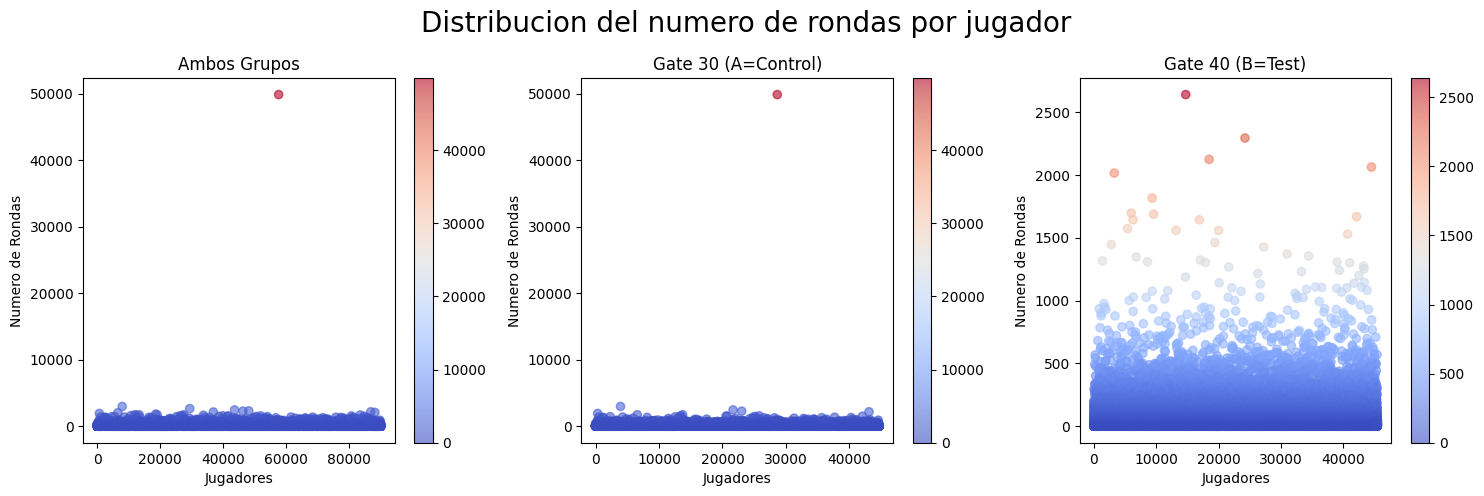

In [33]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Primer plot - Ambos grupos
x_values = range(0, cookie_data.shape[0])
scatter = axes[0].scatter(x_values, cookie_data['sum_gamerounds'], 
                         c=cookie_data['sum_gamerounds'], cmap='coolwarm', alpha=0.6)
axes[0].set_title('Ambos Grupos')
axes[0].set_ylabel('Numero de Rondas')
axes[0].set_xlabel('Jugadores')
plt.colorbar(scatter, ax=axes[0])

# Segundo plot - gate_30 data
gate_30_data = cookie_data[cookie_data.version == 'gate_30']
x_values = range(0, gate_30_data.shape[0])
scatter = axes[1].scatter(x_values, gate_30_data['sum_gamerounds'], 
                         c=gate_30_data['sum_gamerounds'], cmap='coolwarm', alpha=0.6)
axes[1].set_title('Gate 30 (A=Control)')
axes[1].set_ylabel('Numero de Rondas')
axes[1].set_xlabel('Jugadores')
plt.colorbar(scatter, ax=axes[1])

# Tercer plot - gate_40 data
gate_40_data = cookie_data[cookie_data.version == 'gate_40']
x_values = range(0, gate_40_data.shape[0])
scatter = axes[2].scatter(x_values, gate_40_data['sum_gamerounds'], 
                         c=gate_40_data['sum_gamerounds'], cmap='coolwarm', alpha=0.6)
axes[2].set_title('Gate 40 (B=Test)')
axes[2].set_ylabel('Numero de Rondas')
axes[2].set_xlabel('Jugadores')
plt.colorbar(scatter, ax=axes[2])

plt.suptitle('Distribucion del numero de rondas por jugador', fontsize=20)
plt.tight_layout(pad = 1)
plt.show()

Claramente hay un valor atípico (outlier). ¡Este jugador jugó alrededor de 50,000 rondas durante la primera semana! Debido a este valor atípico el grafico de dispersion está extremadamente sesgado y no es muy informativo.

Podemos ver que el jugador pertenece al `gate_30` a nuestro grupo de control, y en nuestro grafico de dispersion del `gate_40` podemos ver que los usuarios tienen un comprtamiento mas comun.

Para entender el comportamiento de la mayoría de los jugadores, revisaremos los percentiles.

In [34]:
# Descripcion de las variables
cookie_data.describe([0.01, 0.05, 0.10, 0.20, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99, 1.00])[['sum_gamerounds']].T

,count,mean,std,min,1%,5%,10%,20%,25%,50%,75%,90%,95%,99%,100%,max
sum_gamerounds,90189.00,51.87,195.05,0.00,0.00,1.00,1.00,3.00,5.00,16.00,51.00,134.00,221.00,493.00,49854.00,49854.00


In [35]:
# Conteo de numero de jugadores por cantidad de rondas
group_rounds = cookie_data.groupby('sum_gamerounds')['userid'].count().reset_index()
group_rounds

,sum_gamerounds,userid
0,0,3994
1,1,5538
2,2,4606
3,3,3958
4,4,3629
...,...,...
937,2294,1
938,2438,1
939,2640,1
940,2961,1


Como podemos observar, el __50% de los jugadores *jugaron menos de 16 rondas*__ durante la primera semana después de la instalación, y el __75% de los jugadores *jugaron menos de 51 rondas*__.

Hay **3994** jugadores no jugaron ni una sola ronda después de la instalación. Las posibles razones pueden incluir:

- Descargaron varios juegos nuevos al mismo tiempo y se sintieron atraídos por otros juegos.
- Abrieron la aplicación pero no les gustó el diseño, la interfaz o la música, por lo que la cerraron antes de jugar.
- Aún no han comenzado a jugar.

Otro número que merece atención es que el **20%** de los jugadores jugaron menos de tres rondas. Para estos jugadores, las razones para abandonar pueden incluir:

- No disfrutaron el juego (probablemente la razón más común).
- El juego resultó ser diferente de lo que esperaban.
- El juego era demasiado fácil y se aburrieron.

Es importante entender por qué un gran número de jugadores abandonan el juego en una etapa temprana. Tactile Entertainment podría intentar recopilar comentarios de los jugadores, por ejemplo, que despues de ciertos minutos salte una ventana emergente para dejar el feedback y la calificacion que le dan al juego directamente en la store de la aplicacion.

## 3.1. Outliers

Haremos varias graficas para visualizar la distribución de `sum_gamerounds`, lo que nos dará una idea aproximada de cuántas rondas del juego jugó un jugador durante la primera semana después de instalar el juego.

Para analizar el comportamiento de la mayoría de los jugadores y reducir el impacto de los valores atípicos (outliers), filtraremos los datos utilizando el percentil 99. Esto significa que eliminamos el 1% superior de los valores en la columna `sum_gamerounds`, que corresponde a los jugadores que jugaron un número extremadamente alto de rondas.

In [36]:
# Eliminar los valores atipicos
cookie_data = cookie_data[cookie_data['sum_gamerounds'] < cookie_data['sum_gamerounds'].max()]
#cookie_data = cookie_data[cookie_data['sum_gamerounds'] < cookie_data['sum_gamerounds'].quantile(0.99)]

In [37]:
# Descripcion de las variables
cookie_data.describe([0.01, 0.05, 0.10, 0.20, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99, 1.00])[['sum_gamerounds']].T

,count,mean,std,min,1%,5%,10%,20%,25%,50%,75%,90%,95%,99%,100%,max
sum_gamerounds,90188.00,51.32,102.68,0.00,0.00,1.00,1.00,3.00,5.00,16.00,51.00,134.00,221.00,493.00,2961.00,2961.00


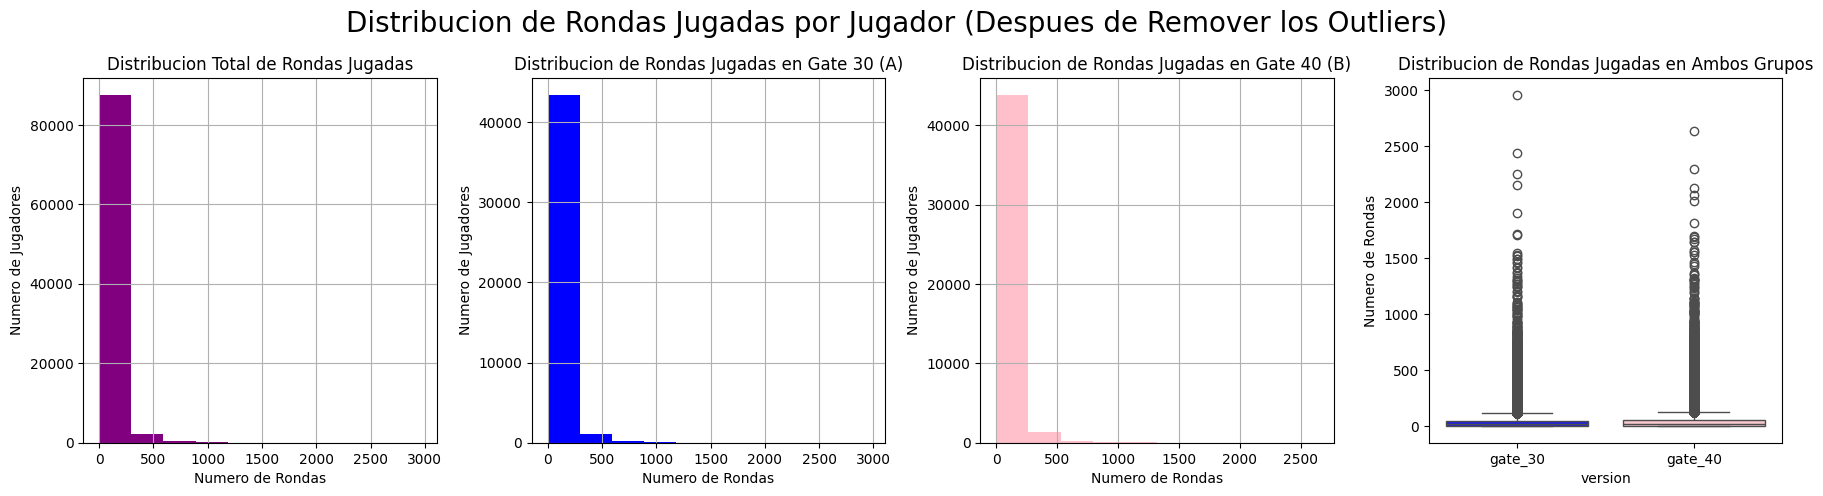

In [38]:
# graficar la distribucion de las rondas de juego
fig, axes = plt.subplots(1, 4, figsize = (18, 5))

# Primer plot - Ambos grupos
cookie_data['sum_gamerounds'].hist(ax = axes[0], color='purple')
axes[0].set_title('Distribucion Total de Rondas Jugadas')
axes[0].set_ylabel('Numero de Jugadores')
axes[0].set_xlabel('Numero de Rondas')

# Segundo plot - gate_30 data
cookie_data[cookie_data['version'] == 'gate_30'].hist(column = 'sum_gamerounds', ax = axes[1], color='blue')
axes[1].set_title('Distribucion de Rondas Jugadas en Gate 30 (A)')
axes[1].set_ylabel('Numero de Jugadores')
axes[1].set_xlabel('Numero de Rondas')

# Tercer plot - gate_40 data
cookie_data[cookie_data['version'] == 'gate_40'].hist(column = 'sum_gamerounds', ax = axes[2], color='pink')
axes[2].set_title('Distribucion de Rondas Jugadas en Gate 40 (B)')
axes[2].set_ylabel('Numero de Jugadores')
axes[2].set_xlabel('Numero de Rondas')

# Cuarto plot - Ambos grupos (grafico de caja)
sns.boxplot(data=cookie_data, x='version', y='sum_gamerounds', ax=axes[3], palette={'gate_30': 'blue', 'gate_40': 'pink'})
axes[3].set_title('Distribucion de Rondas Jugadas en Ambos Grupos')
axes[3].set_ylabel('Numero de Rondas')

plt.suptitle('Distribucion de Rondas Jugadas por Jugador (Despues de Remover los Outliers)', fontsize=20)

plt.tight_layout(pad = 1)
plt.show()

### Conclusion sobre las Distribuciones de Rondas Jugadas

Después de eliminar el 1% de los valores atípicos, se graficaron las distribuciones de las rondas jugadas por los jugadores. y se observa lo siguiente:
 
1. **Distribución Total de Rondas Jugadas**:
   - La mayoría de los jugadores tienden a jugar un número bajo de rondas, con un pico en las primeras decenas de rondas.
   - La distribución muestra una cola larga hacia la derecha, lo que indica que, aunque la mayoría juega pocas rondas, hay una disminución gradual en el número de jugadores que juegan más rondas.

2. **Distribución de Rondas Jugadas en Gate 30 (A)**:
   - Se espera que la mayoría de los jugadores en este grupo también jueguen pocas rondas, con una distribución que disminuye a medida que aumenta el número de rondas.

3. **Distribución de Rondas Jugadas en Gate 40 (B)**:
   - Es probable que la distribución sea comparable, pero podría haber ligeras diferencias en la frecuencia de jugadores que juegan más rondas, dependiendo del impacto de la ubicación de la puerta.

4. **Distribución de Rondas Jugadas en Ambos Grupos**:
   - Este gráfico compara directamente las distribuciones de `gate_30` y `gate_40`.
   - Se espera que ambas distribuciones sean similares, pero podrían observarse diferencias sutiles en las colas de las distribuciones, lo que indicaría un impacto de la ubicación de la puerta en el comportamiento de los jugadores.

### Observaciones Clave:
- **Pico Inicial**: La mayoría de los jugadores juegan pocas rondas, lo que sugiere que muchos abandonan el juego temprano.
- **Cola Larga**: Aunque la mayoría juega pocas rondas, hay una disminución gradual en el número de jugadores que juegan más rondas, lo que indica que algunos jugadores continúan jugando significativamente más.
- **Comparación entre Grupos**: Las diferencias entre `gate_30` y `gate_40` podrían ser mínimas, pero cualquier variación en las colas de las distribuciones podría ser relevante para evaluar el impacto de la ubicación de la puerta.

### Próximos Pasos:
- Realizar pruebas estadísticas para comparar las distribuciones entre `gate_30` y `gate_40`.
- Analizar si las diferencias observadas son estadísticamente significativas.
- Evaluar el impacto de la ubicación de la puerta en la retención de jugadores a corto y largo plazo.


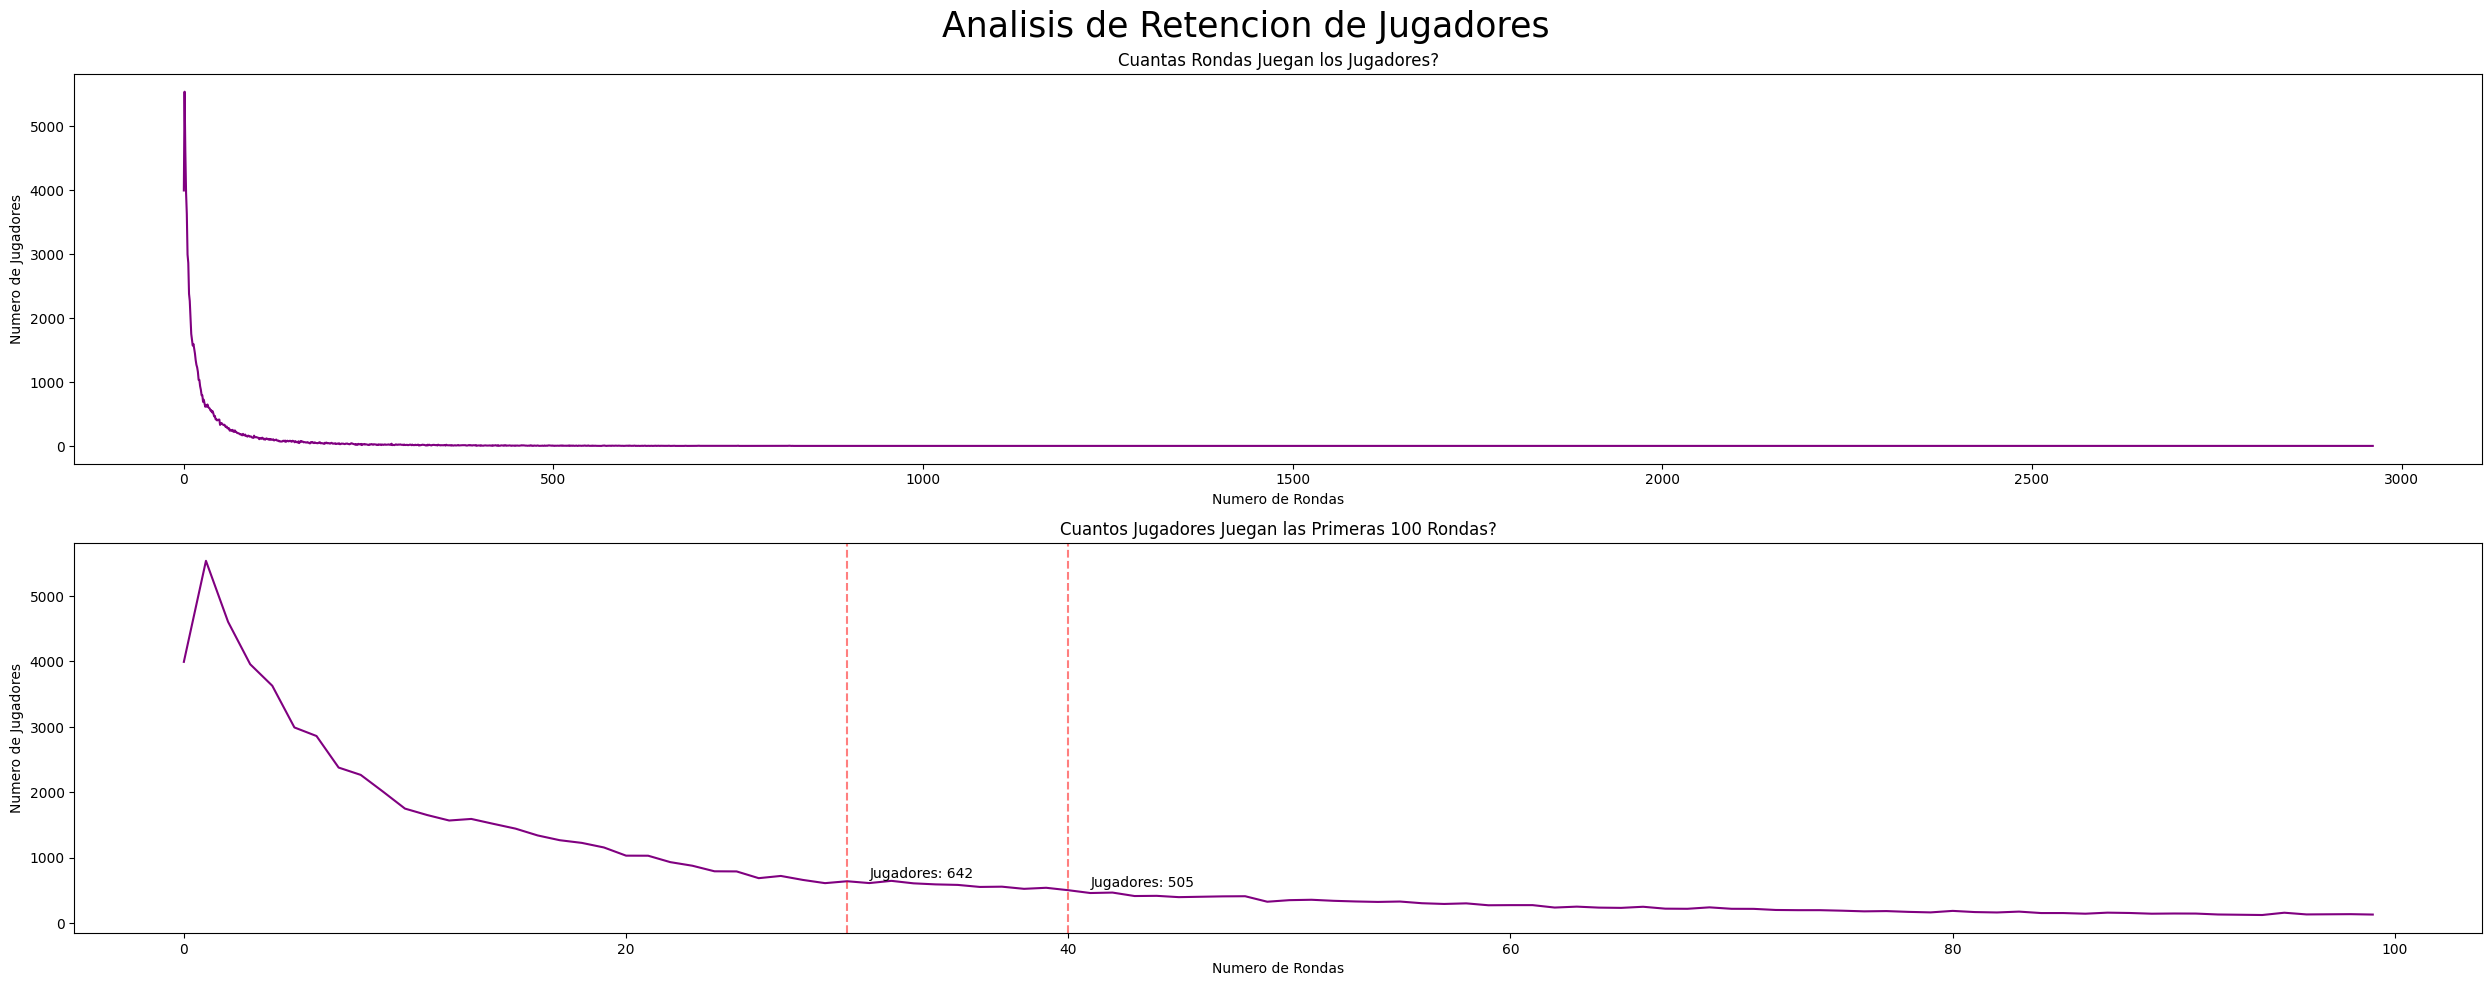

In [39]:
# Retencion de jugadores
fig, axes = plt.subplots(2, 1, figsize = (25,10))

cookie_data.groupby('sum_gamerounds')['userid'].count().plot(ax=axes[0], color='purple')
axes[0].set_title('Cuantas Rondas Juegan los Jugadores?')
axes[0].set_ylabel('Numero de Jugadores')
axes[0].set_xlabel('Numero de Rondas')


ax2_plot = cookie_data.groupby('sum_gamerounds')['userid'].count()[:100].plot(ax=axes[1], color='purple')

# Agregar una linea vertical en la ronda 30
y_val_at_30 = cookie_data.groupby('sum_gamerounds')['userid'].count()[30]
axes[1].axvline(x=30, color='red', linestyle='--', alpha=0.5)
axes[1].text(31, y_val_at_30, f'Jugadores: {y_val_at_30}', verticalalignment='bottom')

# Agregar una linea vertical en la ronda 40
y_val_at_40 = cookie_data.groupby('sum_gamerounds')['userid'].count()[40]
axes[1].axvline(x=40, color='red', linestyle='--', alpha=0.5)
axes[1].text(41, y_val_at_40, f'Jugadores: {y_val_at_40}', verticalalignment='bottom')

axes[1].set_title('Cuantos Jugadores Juegan las Primeras 100 Rondas?')
axes[1].set_ylabel('Numero de Jugadores')
axes[1].set_xlabel('Numero de Rondas')

plt.suptitle('Analisis de Retencion de Jugadores', fontsize=25)
plt.tight_layout(pad = 1)
plt.show()

### Distribución de Rondas Jugadas

La distribución está altamente sesgada, con una cola larga hacia la derecha. Un gran número de jugadores jugó menos de 20 rondas y abandonó el juego. Para rondas mayores a 60, el número de jugadores se mantuvo estable en aproximadamente 300.

In [40]:
# Cuantos jugadores pasaron de la puerta 30 a la puerta 40
print(cookie_data.groupby('sum_gamerounds')['userid'].count().loc[[30, 40]])

sum_gamerounds
30    642
40    505
Name: userid, dtype: int64


In [41]:
# Cuantos jugadores pasaron a la puerta 30 del grupo A
print('Jugadores que pasaron de la puerta 30 a la puerta 40 del grupo A:', cookie_data[(cookie_data['version'] == 'gate_30') & (cookie_data['sum_gamerounds'] == 30)].shape[0])
# Cuantos jugadores pasaron a la puerta 40 del grupo B
print('Jugadores que pasaron de la puerta 30 a la puerta 40 del grupo B:', cookie_data[(cookie_data['version'] == 'gate_40') & (cookie_data['sum_gamerounds'] == 40)].shape[0])

Jugadores que pasaron de la puerta 30 a la puerta 40 del grupo A: 298
Jugadores que pasaron de la puerta 30 a la puerta 40 del grupo B: 227


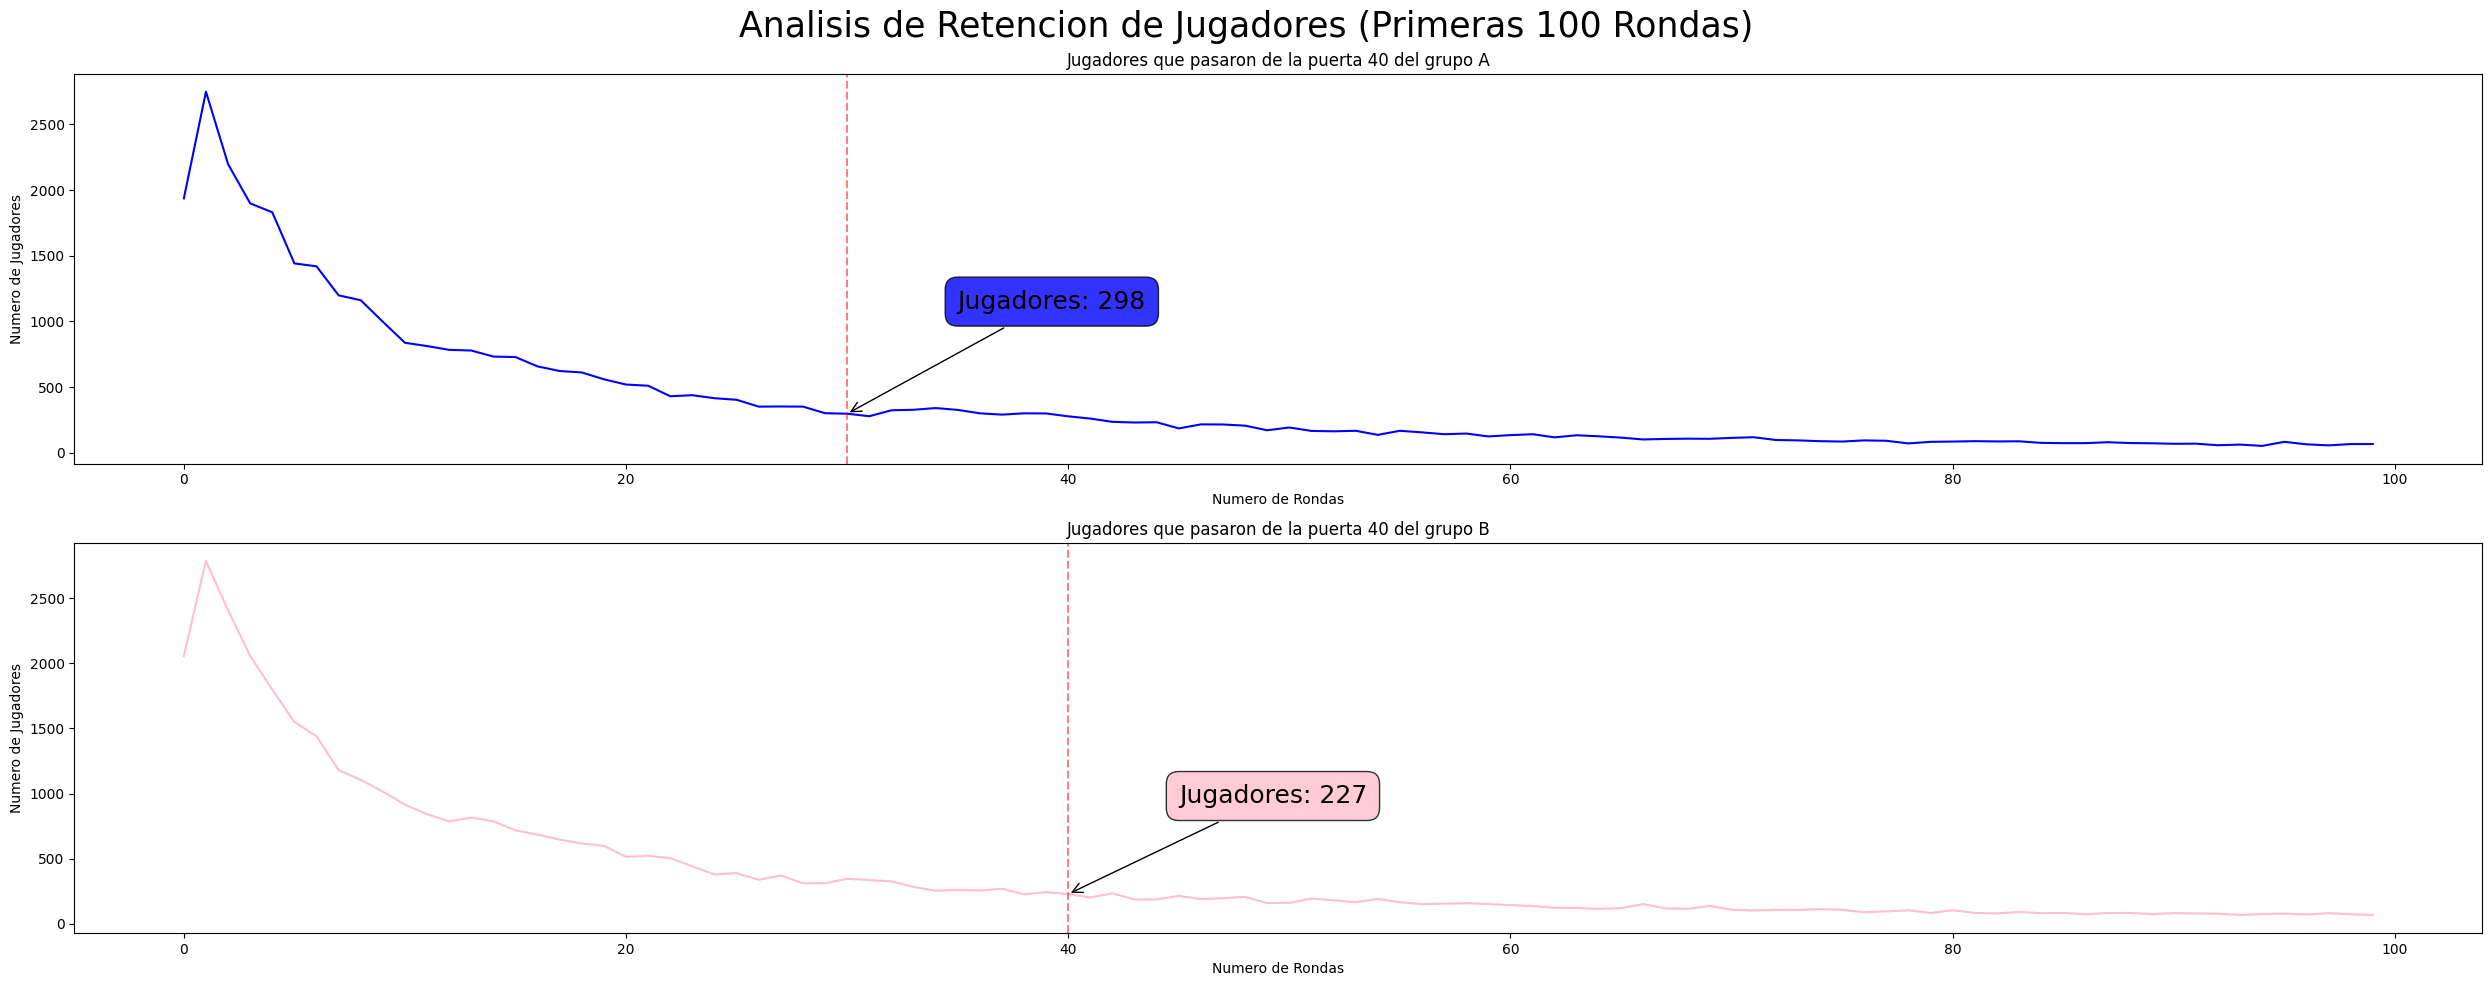

In [42]:
fig, axes = plt.subplots(2, 1, figsize=(25, 10))

# Primer plot - gate_30 data (primeras 100 rondas)
gate_30_players = cookie_data[cookie_data['version'] == 'gate_30'].groupby('sum_gamerounds')['userid'].count()[:100]
gate_30_players.plot(ax=axes[0], color='blue')
axes[0].set_title('Jugadores que pasaron de la puerta 40 del grupo A')
axes[0].set_ylabel('Numero de Jugadores')
axes[0].set_xlabel('Numero de Rondas')
axes[0].axvline(x=30, color='red', linestyle='--', alpha=0.5)
gate_30_at_40 = gate_30_players.get(30, 0)
axes[0].annotate(f'Jugadores: {gate_30_at_40}', 
                xy=(30, gate_30_at_40), 
                xytext=(35, gate_30_at_40 + 800), # Incrementé el valor de 100 a 200 para mover la caja más arriba
                bbox=dict(boxstyle='round,pad=0.5', fc='blue', alpha=0.8),
                fontsize=18,
                arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))

# Segundo plot - gate_40 data (primeras 100 rondas)
gate_40_players = cookie_data[cookie_data['version'] == 'gate_40'].groupby('sum_gamerounds')['userid'].count()[:100]
gate_40_players.plot(ax=axes[1], color='pink')
axes[1].set_title('Jugadores que pasaron de la puerta 40 del grupo B')
axes[1].set_ylabel('Numero de Jugadores')
axes[1].set_xlabel('Numero de Rondas')
axes[1].axvline(x=40, color='red', linestyle='--', alpha=0.5)
gate_40_at_40 = gate_40_players.get(40, 0)
axes[1].annotate(f'Jugadores: {gate_40_at_40}',
                xy=(40, gate_40_at_40),
                xytext=(45, gate_40_at_40 + 700),
                bbox=dict(boxstyle='round,pad=0.5', fc='pink', alpha=0.8),
                fontsize=18,
                arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))

plt.suptitle('Analisis de Retencion de Jugadores (Primeras 100 Rondas)', fontsize=25)
plt.tight_layout(pad=1)
plt.show()

Aquí podemos observar que la diferencia entre ambos grupos es mínima: los del grupo `gate_30` alcanzaron **298 jugadores**, mientras que los del grupo `gate_40` llegaron a **227 jugadores**. Con esto, podemos deducir que, por ahora, no se puede ver una diferencia muy significativa entre ambos grupos. Sin embargo, es importante investigar por qué los jugadores pierden interés en el juego.

# 4. Comparación de la Retención del Día 1 y al Día 7

En los graficos y datos analizados, podemos observar que algunos jugadores instalan el juego pero nunca lo juegan, algunos juegan solo un par de rondas en su primera semana, y otros se enganchan mucho. Lo que queremos es que a los jugadores les guste el juego y se enganchen.

Una métrica común en la industria de los videojuegos para medir cuán divertido y atractivo es un juego es la **retención del día 1**: el porcentaje de jugadores que regresan y juegan el juego un día después de haberlo instalado. Cuanto mayor sea la retención a 1 día, más fácil será retener a los jugadores y construir una base de jugadores grande.

## 4.1. Retención a 1 Día 📅

In [43]:
# Retencion de jugadores al dia 1
print('Se encontraron', cookie_data[cookie_data['retention_1'] == 1].count()[0], 'jugadores que jugaron 1 dia')

Se encontraron 40153 jugadores que jugaron 1 dia


In [44]:
# Calcular la media de jugadores que jugaron 1 dia
print(f'La media de jugadores que jugaron 1 dia es: {cookie_data["retention_1"].mean() * 100:.2f}%')

La media de jugadores que jugaron 1 dia es: 44.52%


### Análisis de Retención a 1 Día 📅

Un poco menos de la mitad de los jugadores regresan un día después de instalar el juego. Esto nos da un **punto de referencia** importante. Ahora, veamos cómo difiere la **retención a 1 día** entre los dos grupos de la prueba **A/B**. 🧪

#### Comparación entre Grupos: ⚖️

- **Grupo A**: Jugadores con la puerta en el nivel 30.  
- **Grupo B**: Jugadores con la puerta en el nivel 40.

#### Objetivo: 🎯  
Determinar si la ubicación de la puerta afecta significativamente la retención de los jugadores después del primer día. 📊

#### Siguientes Pasos: 🚀  
1. Calcular la retención a 1 día para ambos grupos.  
2. Realizar un análisis estadístico para comparar las diferencias.  
3. Interpretar los resultados y tomar decisiones basadas en los datos. 💡

In [45]:
# Calcular y mostrar la retencion al dia 1 por version (en porcentaje)
print(cookie_data.groupby('version')['retention_1'].mean() * 100)

version
gate_30   44.82
gate_40   44.23
Name: retention_1, dtype: float64


Parece que hubo una ligera disminución en la retención a 1 día cuando la puerta se movió al nivel 40 (44.2%) en comparación con el grupo de control cuando estaba en el nivel 30 (44.8%). Es un cambio pequeño, pero incluso los cambios pequeños en la retención pueden tener un gran impacto. Sin embargo, aunque estamos seguros de la diferencia en los datos, ¿qué tan seguros deberíamos estar de que una puerta en el nivel 40 será mejor o peor en el futuro?

Hay un par de formas en que podemos evaluar la certeza de estos números de retención. Aquí utilizaremos **bootstrapping**: Re-muestrearemos repetidamente nuestro conjunto de datos (con reemplazo) y calcularemos la retención a 1 día para esas muestras. La variación en la retención a 1 día nos dará una indicación de cuán inciertos son los números de retención.

## 4.2. Bootstrapping: ¿Deberíamos confiar en la diferencia?

<Axes: title={'center': 'Distribucion de Retencion al Dia 1 por Version'}, ylabel='Density'>

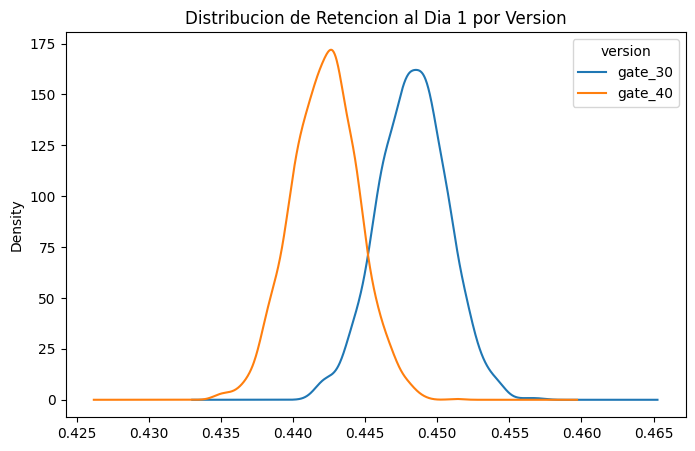

In [49]:
# Creando una lista con medias bootstrapped para cada grupo A/B
boot_1d = []
for i in range(2000): # Cambiar el numero de repeticiones para obtener una distribucion mas suave
    boot_mean = cookie_data.sample(frac=1, replace=True).groupby('version')['retention_1'].mean() # muestreo con reemplazo
    boot_1d.append(boot_mean) # guardar la media de retencion al dia 1

# Transformar la lista en un DataFrame
boot_1d = pd.DataFrame(boot_1d)

# Graficar la distribucion de las medias bootstrapped
boot_1d.plot(kind='kde', figsize=(8, 5), title='Distribucion de Retencion al Dia 1 por Version')

Estas dos distribuciones representan la incertidumbre del bootstrap sobre cuál podría ser la retención subyacente a 1 día para los dos grupos A/B. Parece haber cierta evidencia de una diferencia, aunque pequeña. Vamos a graficar el porcentaje de diferencia para observar más de cerca.

In [50]:
# Añadir columna con la diferencia entre los dos grupos
boot_1d['diff'] = (boot_1d['gate_30'] - boot_1d['gate_40']) / boot_1d['gate_40'] * 100
boot_1d.head()

version,gate_30,gate_40,diff
retention_1,0.45,0.44,1.45
retention_1,0.45,0.44,1.84
retention_1,0.45,0.44,1.75
retention_1,0.45,0.44,2.10
retention_1,0.45,0.44,1.85


Probabilidad que la retencion al dia 1 sea mejor cuando la puerta esta en el nivel 30: 0.9635


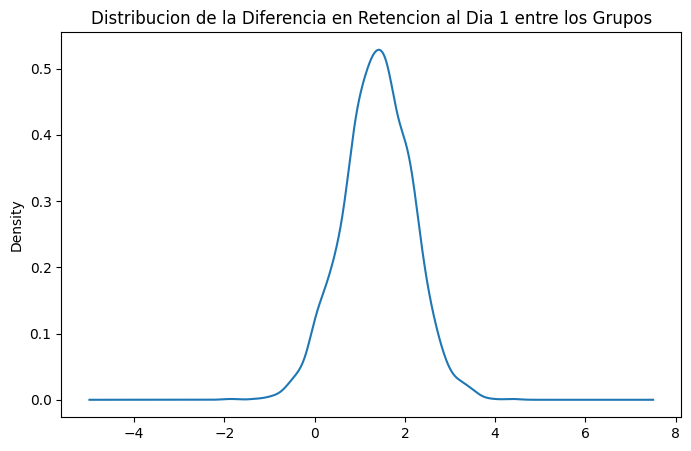

In [ ]:
# Graficar la distribucion de la diferencia entre los grupos
ax = boot_1d['diff'].plot(kind='density', figsize=(8, 5), title='Distribucion de la Diferencia en Retencion al Dia 1 entre los Grupos')

# Calcular la probabilidad que la retencion al dia 1 sea mejor cuando la puerta esta en el nivel 30
print('Probabilidad que la retencion al dia 1 sea mejor cuando la puerta esta en el nivel 30:', (boot_1d['diff'] > 0).mean())

A partir de este gráfico, podemos ver que la diferencia porcentual más probable está alrededor del **1% - 2%**, y que el **96%** de la distribución está por encima del **0%**, a favor de una puerta en el nivel 30.

## 4.3. Retención a 7 Días 📅

El análisis de bootstrap nos dice que existe una alta probabilidad de que la retención a 1 día sea mejor cuando la puerta está en el nivel 30. Sin embargo, dado que los jugadores solo han estado jugando el juego durante un día, es probable que la mayoría de los jugadores no hayan llegado al nivel 30 todavía. Es decir, muchos jugadores no se habrán visto afectados por la puerta, incluso si está tan temprano como en el nivel 30.

Pero después de haber jugado durante una semana, más jugadores deberían haber alcanzado el nivel 40, y por lo tanto, tiene sentido también analizar la **retención a 7 días**. ⏳

In [52]:
# Retencion de jugadores al dia 7
print('Se encontraron', cookie_data[cookie_data['retention_7'] == 1].count()[0], 'jugadores que jugaron 7 dias')

Se encontraron 16780 jugadores que jugaron 7 dias


In [53]:
# Calcular la media de jugadores que jugaron 7 dias
print(f'La media de jugadores que jugaron 7 dias es: {cookie_data["retention_7"].mean() * 100:.2f}%')

La media de jugadores que jugaron 7 dias es: 18.61%


### Análisis de Retención 📊

La media de retención a los **7 días** es muy baja, de tan solo el **18.61%**, en comparación con el **44.52%** de retención al **día 1**. Esto nos indica que los jugadores fueron abandonando el juego conforme pasaron los días. 📅

### Posibles razones para esta disminución: 🤔

1. **Dificultad del juego**: 🎮  
   - Es posible que el juego se haya vuelto demasiado difícil para los jugadores, lo que llevó a que abandonaran.

2. **Falta de interés**: 😕  
   - Los jugadores podrían haber perdido el interés en el juego después de los primeros días.

3. **Falta de tiempo**: ⏳  
   - Algunos jugadores podrían no haber tenido el tiempo necesario para continuar jugando.

#### Conclusión: 🚨  
Es crucial tomar en cuenta la **retención de los jugadores** a lo largo del tiempo para identificar los puntos de mejora y garantizar una experiencia de juego más atractiva y duradera. 💡

In [54]:
# Calcular y mostrar la retencion al dia 7 por version (en porcentaje)
print(cookie_data.groupby('version')['retention_7'].mean() * 100)

version
gate_30   19.02
gate_40   18.20
Name: retention_7, dtype: float64


## 4.4. Bootstraping de retencion de 7 dias

<Axes: title={'center': 'Distribucion de Retencion al Dia 7 por Version'}, ylabel='Density'>

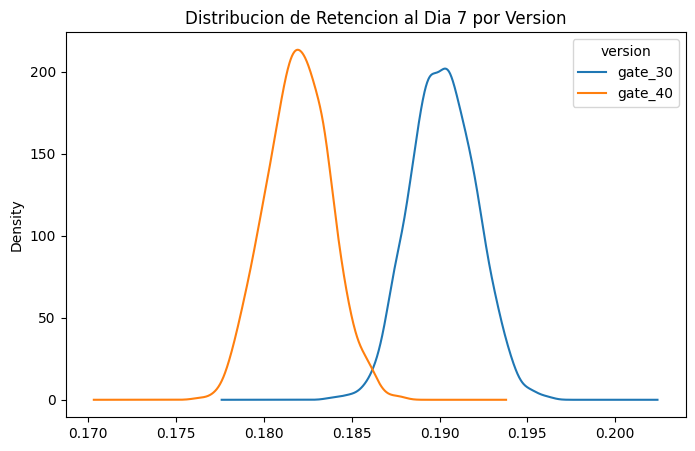

In [55]:
# Creando una lista con medias bootstrapped para cada grupo A/B
boot_7d = []
for i in range(2000): # Cambiar el numero de repeticiones para obtener una distribucion mas suave
    boot_mean = cookie_data.sample(frac=1, replace=True).groupby('version')['retention_7'].mean() # muestreo con reemplazo
    boot_7d.append(boot_mean) # guardar la media de retencion al dia 7

# Transformar la lista en un DataFrame
boot_7d = pd.DataFrame(boot_7d)

# Graficar la distribucion de las medias bootstrapped
boot_7d.plot(kind='kde', figsize=(8, 5), title='Distribucion de Retencion al Dia 7 por Version')

In [56]:
# Añadir columna con la diferencia entre los dos grupos
boot_7d['diff'] = (boot_7d['gate_30'] - boot_7d['gate_40']) / boot_7d['gate_40'] * 100
boot_7d.head()

version,gate_30,gate_40,diff
retention_7,0.19,0.18,3.57
retention_7,0.19,0.18,2.83
retention_7,0.19,0.18,5.25
retention_7,0.19,0.18,3.68
retention_7,0.19,0.18,4.57


Probabilidad que la retencion al dia 7 sea mejor cuando la puerta esta en el nivel 30: 0.9995


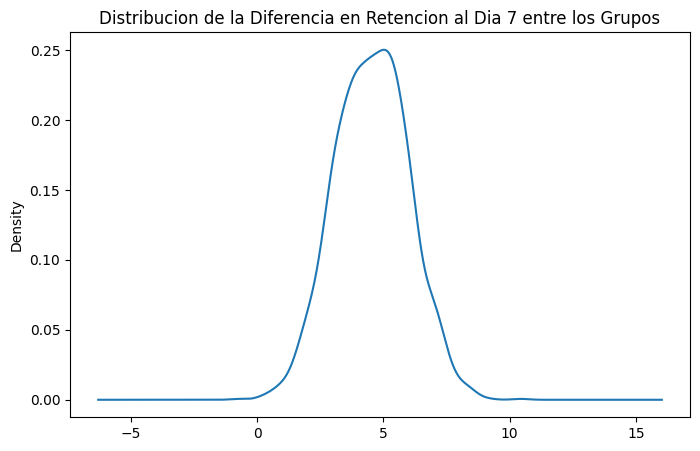

In [57]:
# Graficar la distribucion de la diferencia entre los grupos
ax = boot_7d['diff'].plot(kind='density', figsize=(8, 5), title='Distribucion de la Diferencia en Retencion al Dia 7 entre los Grupos')

# Calcular la probabilidad que la retencion al dia 7 sea mejor cuando la puerta esta en el nivel 30
print('Probabilidad que la retencion al dia 7 sea mejor cuando la puerta esta en el nivel 30:', (boot_7d['diff'] > 0).mean())

El resultado del análisis de bootstrap nos indica que existe **evidencia sólida** de que la **retención a 7 días** es mayor cuando la puerta está en el **nivel 30** en comparación con el **nivel 40**. La conclusión es clara: si queremos mantener una **retención alta** (tanto a 1 día como a 7 días), **no deberíamos mover la puerta del nivel 30 al nivel 40**. 🚫

### Otras métricas a considerar: 📈
Por supuesto, hay otras métricas que podríamos analizar, como:
- El **número de rondas jugadas**. 🎮
- Las **compras dentro del juego** realizadas por los dos grupos de la prueba A/B. 💰

Sin embargo, la **retención** es una de las métricas más importantes. Si no retenemos a nuestra base de jugadores, no importa cuánto dinero gasten dentro del juego. 💡

### ¿Por qué la retención es mayor cuando la puerta está al principio? 🤔
Uno podría esperar lo contrario: cuanto más tarde esté el obstáculo, más tiempo van a interactuar los jugadores con el juego. Pero los datos no respaldan esta idea. La **teoría de la adaptación hedónica** puede dar una explicación a esto.

### Adaptación Hedónica: 🧠
En resumen, la adaptación hedónica es la tendencia de las personas a obtener **menos disfrute** de una actividad divertida con el tiempo si esa actividad se realiza de manera continua. Al forzar a los jugadores a tomar un descanso cuando llegan a una puerta, su disfrute del juego se prolonga. Pero cuando la puerta se mueve al nivel 40, **menos jugadores llegan tan lejos**, y es más probable que abandonen el juego simplemente porque se aburrieron. 😴

## Conclusión: 🚀
Mantener la puerta en el **nivel 30** no solo ayuda a mejorar la retención a corto plazo, sino que también prolonga el interés y el disfrute de los jugadores a largo plazo. ¡Una decisión basada en datos! 📊✨

# 5. Prueba A/B

## Supuestos y Pasos para el Análisis Estadístico 📝

#### Supuestos: 🧐
1. **Verificar normalidad**: Comprobar si los datos siguen una distribución normal. 📏
2. **Si hay distribución normal**: Verificar la homogeneidad de varianzas. ⚖️

#### Pasos: 🚶‍♂️

1. **Dividir y definir los grupos**:  
   - **Grupo de Control**: Grupo de referencia.  
   - **Grupo de Prueba**: Grupo que se está evaluando. 🧪

2. **Aplicar la prueba de Shapiro-Wilk**:  
   - Esta prueba se utiliza para verificar si los datos siguen una **distribución normal**. 📊

3. **Si los datos son paramétricos (distribución normal)**:  
   - Aplicar la **prueba de Levene** para verificar la **homogeneidad de varianzas**. ⚖️

4. **Si los datos son paramétricos y hay homogeneidad de varianzas**:  
   - Aplicar la **prueba T de Student** (T-Test). 🧪

5. **Si los datos son paramétricos pero no hay homogeneidad de varianzas**:  
   - Aplicar la **prueba de Welch** (Welch Test). 📉

6. **Si los datos no son paramétricos (no siguen una distribución normal)**:  
   - Aplicar directamente la **prueba de Mann-Whitney U**. 📊

#### Resumen: 📋
- **Normalidad**: Shapiro-Wilk.  
- **Homogeneidad de varianzas**: Levene.  
- **Paramétrico + homogeneidad**: T-Test.  
- **Paramétrico - homogeneidad**: Welch Test.  
- **No paramétrico**: Mann-Whitney U.

In [59]:
# Definir los grupos A/B
cookie_data['version'] = np.where(cookie_data['version'] == 'gate_30', 'A', 'B')
cookie_data.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,A,3,False,False
1,337,A,38,True,False
2,377,B,165,True,False
3,483,B,1,False,False
4,488,B,179,True,True


In [66]:
# Funcion A/B Testing - Solucion Rapida

def AB_test(dataframe, group, target):

    # Split A/B
    groupA = dataframe[dataframe[group] == 'A'][target]
    groupB = dataframe[dataframe[group] == 'B'][target]

    # Supuesto: Normalidad
    ntA = shapiro(groupA)[1] < 0.05
    ntB = shapiro(groupB)[1] < 0.05
    # H0: La distribucion es normal - False
    # H1: La distribucion no es normal - True

    if (ntA == False) & (ntB == False): # H0: La distribucion es normal
        # Test Levene
        # Supuesto: Homogeneidad de Varianzas
        LeveneTest = stats.levene(groupA, groupB)[1] < 0.05
        # H0: Varianzas Homogeneas - False
        # H1: Varianzas no Homogeneas - True

        if LeveneTest == False: # H0: Varianzas Homogeneas
            # Test T de Student
            # Homogeneidad de Varianzas
            test = stats.ttest_ind(groupA, groupB, equal_var=True)[1]
            # H0: No hay diferencias significativas - False
            # H1: Hay diferencias significativas - True
        else:
            # Heterogeneidad de Varianzas
            test = stats.ttest_ind(groupA, groupB, equal_var=False)[1]
            # H0: No hay diferencias significativas - False
            # H1: Hay diferencias significativas - True
    else:
        # Test U de Mann-Whitney
        ttest = stats.mannwhitneyu(groupA, groupB)[1]
        # H0: No hay diferencias significativas - False
        # H1: Hay diferencias significativas - True

    # Resultados
    temp = pd.DataFrame({
        'AB Hypothesis':[ttest < 0.05],
        'P-Value':[ttest]
    })
    temp['Test Type'] = np.where((ntA == False) & (ntB == False), 'Parametrico', 'No Parametrico')
    temp['AB Hypothesis'] = np.where(temp['AB Hypothesis'] == False, 'No rechazar la Hipothesis Nula', 'Rechazar la Hipothesis Nula')
    temp['Comment'] = np.where(temp['AB Hypothesis'] == 'Rechazar la Hipothesis Nula', 'Hay diferencias significativas', 'No hay diferencias significativas')

    # Columnas
    if (ntA == False) & (ntB == False):
        temp['Homogeinity'] = np.where(LeveneTest == False, 'Varianzas Homogeneas', 'Varianzas no Homogeneas')
        temp = temp[['Test Type', 'Homogeinity', 'AB Hypothesis', 'P-Value', 'Comment']]
    else:
        temp = temp[['Test Type', 'AB Hypothesis', 'P-Value', 'Comment']]

    # Imprimir Hipotesis
    print('Hipotesis del Test A/B')
    print('-'*30)
    print('H0: Las medias de los grupos son iguales')
    print('H1: Las medias de los grupos son diferentes')

    return temp


In [67]:
# Aplicar la funcion
AB_test(cookie_data, 'version', 'sum_gamerounds')

Hipotesis del Test A/B
------------------------------
H0: Las medias de los grupos son iguales
H1: Las medias de los grupos son diferentes


,Test Type,AB Hypothesis,P-Value,Comment
0,No Parametrico,No rechazar la Hipothesis Nula,0.05,No hay diferencias significativas


### 7. Conclusión 🎯

#### Recordemos el problema de negocio: 🧐
A medida que los jugadores avanzan en el juego, se encuentran con **puertas** que los obligan a esperar un tiempo antes de poder progresar o realizar una compra dentro de la aplicación. En este proyecto, analizamos los resultados de una **prueba A/B** en la que la primera puerta en **Cookie Cats** se movió del **nivel 30** al **nivel 40**. En particular, analizamos el impacto en la **retención de jugadores** y las **rondas del juego**.

#### Análisis inicial: 🔍
1. **Relaciones y estructuras en los datos**:  
   - No hubo problemas de valores faltantes, pero sí un problema de **outliers** (valores atípicos). 📉
   - Las estadísticas resumidas y los gráficos nos ayudaron a comprender los datos y el problema. 📊

2. **Antes de la prueba A/B**:  
   - Compartimos detalles sobre el juego, los jugadores, los problemas y sugerencias con nuestro cliente/director/CEO. 💼

#### Resultados de la prueba A/B: 📈
1. **Prueba de Shapiro-Wilk**:  
   - Rechazó la hipótesis nula (**H0**) para el supuesto de normalidad. Por lo tanto, tuvimos que aplicar una prueba **no paramétrica**, como la prueba de **Mann-Whitney U**, para comparar los dos grupos. 🧪

2. **Prueba de Mann-Whitney U**:  
   - Rechazó la hipótesis nula (**H0**), lo que nos indicó que los grupos **A/B no son similares**. ❌

#### Conclusión clave: 📋
- Existen **diferencias estadísticamente significativas** entre los dos grupos en cuanto a mover la primera puerta del **nivel 30** al **nivel 40** en relación con las rondas del juego. 🎮

#### ¿Qué nivel tiene más ventajas en términos de retención de jugadores? 🏆
- La **retención promedio a 1 día y a 7 días** es mayor cuando la puerta está en el **nivel 30** en comparación con el **nivel 40**. 📊

#### Resumen final: 🚀
Mantener la puerta en el **nivel 30** no solo mejora la retención de jugadores a corto y largo plazo, sino que también tiene un impacto positivo en las rondas del juego. ¡Una decisión basada en datos! 📈✨